# Ein Testbild runterladen

In [13]:
import urllib.request
URL = "http://www.juergenbrauer.org/datasets/testbild.png"
dateiname = "testbild.png"
r = urllib.request.urlretrieve(URL, dateiname)

In [14]:
r

('testbild.png', <http.client.HTTPMessage at 0x7fe3c9c65350>)

# Testbild einlesen

In [2]:
import cv2

In [3]:
img = cv2.imread("testbild.png")

In [4]:
type(img)

numpy.ndarray

In [5]:
img.dtype

dtype('uint8')

In [6]:
img.ndim

3

In [7]:
img.shape

(800, 800, 3)

In [8]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# Das Testbild anzeigen

In [9]:
import matplotlib.pyplot as plt

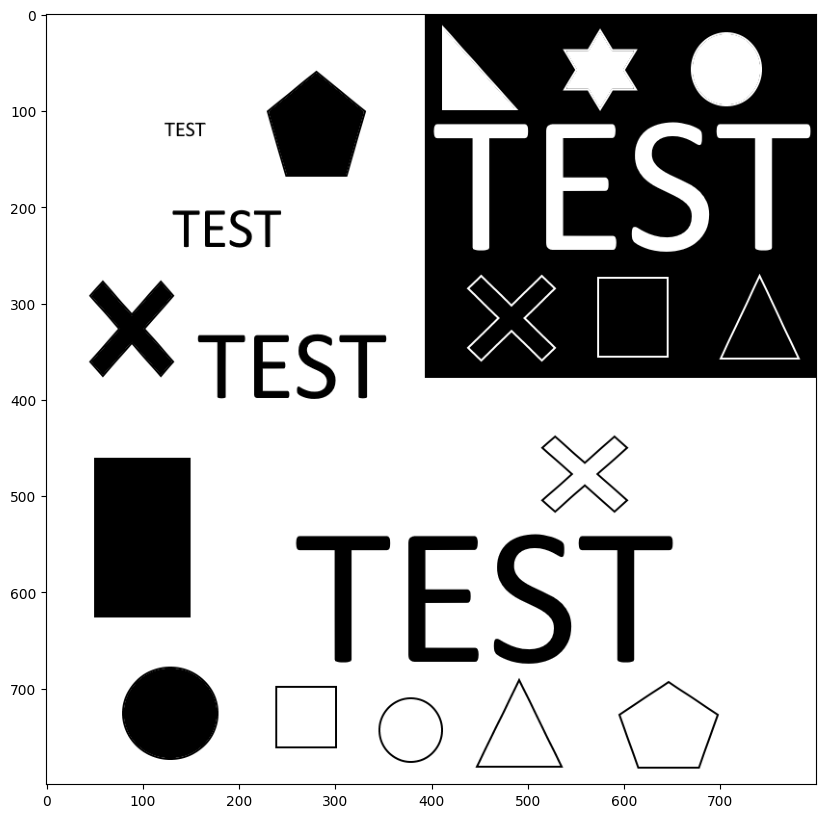

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

# Eine Linie direkt im Bild einfügen

In [48]:
einkaufsliste = [2, "Brötchen", 3, "Croissants", 4, "Käsekuchen"]

In [49]:
einkaufsliste

[2, 'Brötchen', 3, 'Croissants', 4, 'Käsekuchen']

In [50]:
type(einkaufsliste)

list

In [57]:
start = 0
stop  = 6
step  = 2
sum(einkaufsliste[start:stop:step])

9

In [58]:
einkaufsliste[start:stop:step]

[2, 3, 4]

In [53]:
einkaufsliste[-3:]

['Croissants', 4, 'Käsekuchen']

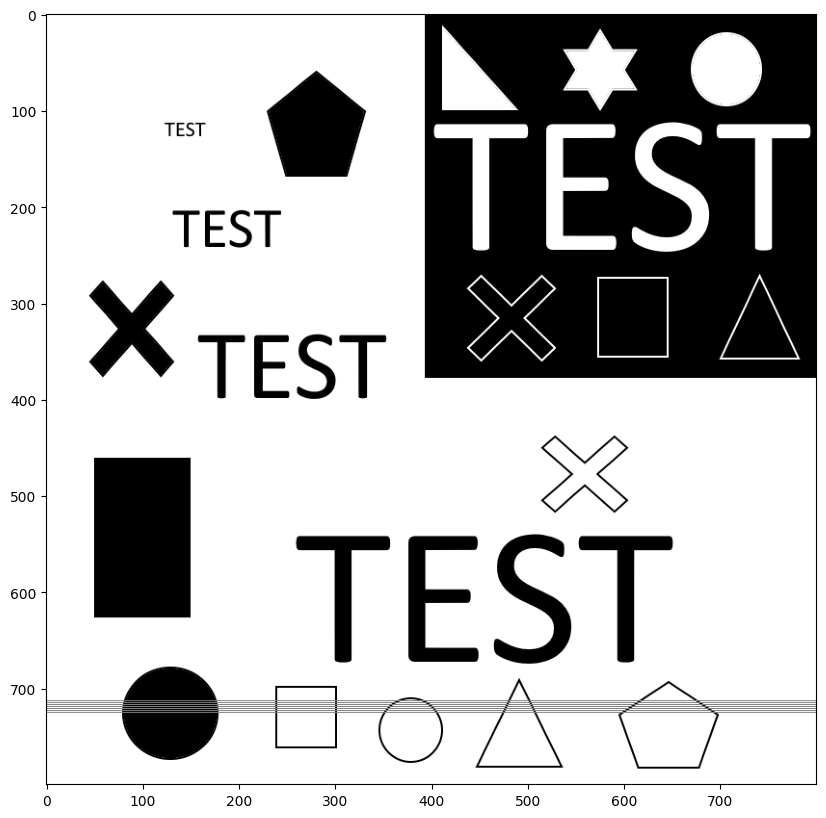

In [93]:
#img = cv2.imread("testbild.png")

breite = img.shape[1]
hoehe = 720
lb = 15
img[hoehe-lb//2:hoehe+lb//2:2,:,:] = 128

plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

    x: 450 - 550
    y: 680 - 799
    Quiz: Wie müsste ich das img "Slicen" um diesen Bildausschnitt zu erhalten und anzuzeigen?

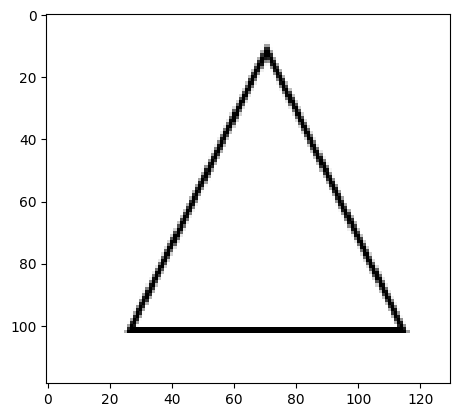

In [80]:
#img2 = img[680:799,420:550,:].copy()
plt.imshow(img2)
plt.show()

In [68]:
id( img[680:799,420:550,:] )

140616274435344

In [69]:
id( img )

140616276914608

# Testbild in Graustufenbild umwandeln

In [86]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [87]:
type(gray)

numpy.ndarray

In [88]:
gray.ndim

2

In [89]:
gray.shape

(800, 800)

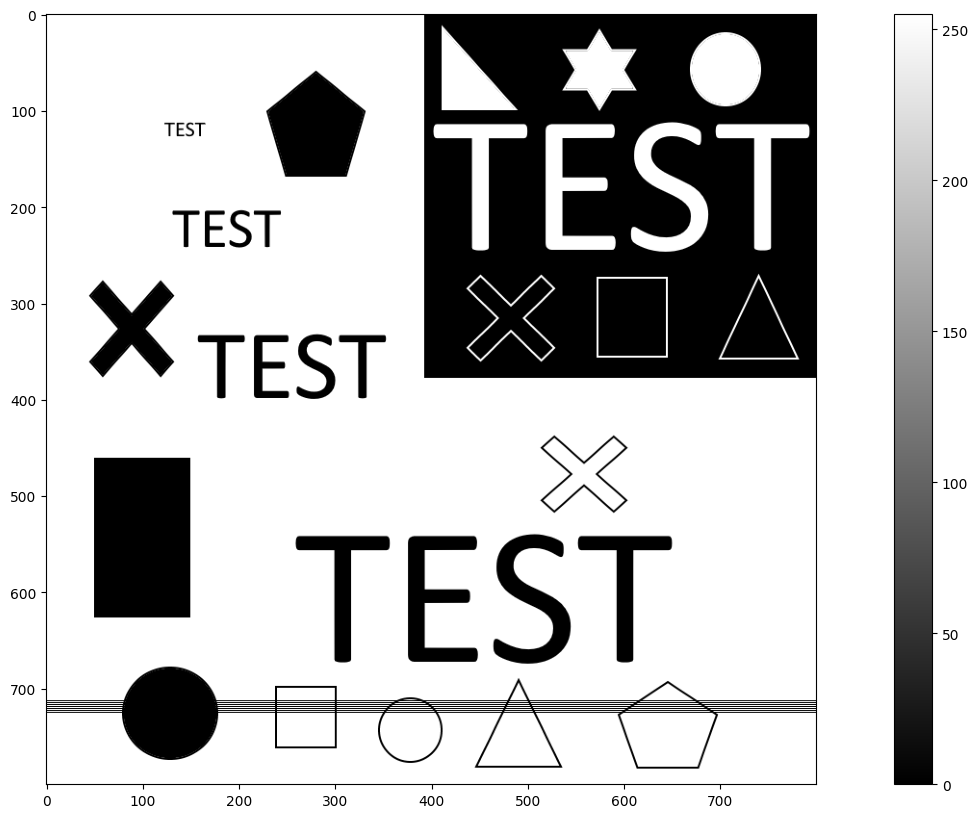

In [92]:
plt.figure(figsize=(20,10))
plt.imshow(gray, cmap="gray")
plt.colorbar()
plt.show()

In [94]:
gray.dtype

dtype('uint8')

In [95]:
import numpy as np
gray_float = np.float32(gray)

In [96]:
gray_float.dtype

dtype('float32')

In [97]:
gray_float

array([[255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

# Einen Bildfilter definieren

In [98]:
kernel = np.array([[-1.0, 0.0, 1.0],
                   [-1.0, 0.0, 1.0],
                   [-1.0, 0.0, 1.0]])

# --> maximaler Filterantwortwert = 3 * 255 = 765
imgpatch = np.array([[0.0, 0.0, 255.0],
                     [0.0, 0.0, 255.0],
                     [0.0, 0.0, 255.0]])

# --> minimaler Filterantwortwert = -3 * 255 = -765
imgpatch2 = np.array([[255.0, 0.0, 0.0],
                      [255.0, 0.0, 0.0],
                      [255.0, 0.0, 0.0]])

In [99]:
kernel.shape

(3, 3)

In [100]:
kernel

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [101]:
kernel.dtype

dtype('float64')

# Filter auf Bild anwenden

In [102]:
M = cv2.filter2D(gray_float, -1, kernel)

In [103]:
M.shape

(800, 800)

In [104]:
M

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
M.min()

-765.0

In [106]:
M.max()

765.0

# Filterergebnis visualisieren

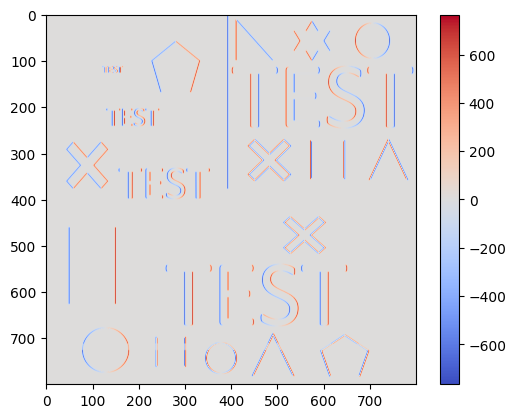

In [109]:
plt.imshow(M, cmap="coolwarm")
plt.colorbar()
plt.show()

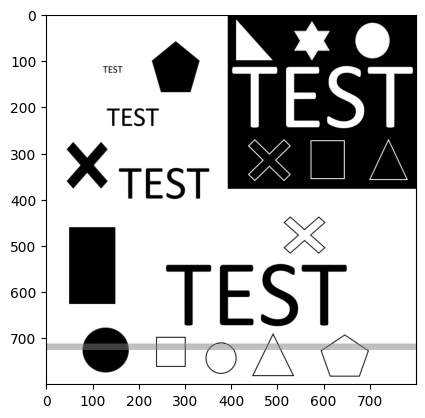

In [110]:
plt.imshow(img)
plt.show()

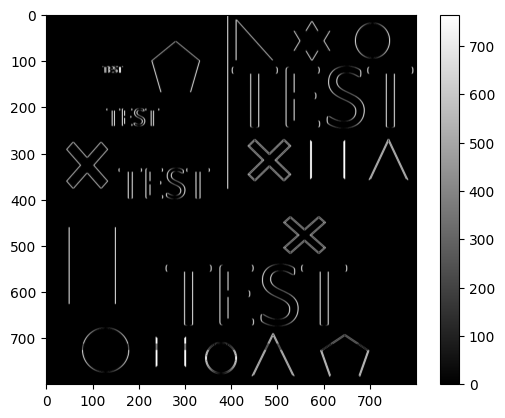

In [112]:
plt.imshow(abs(M), cmap="gray")
plt.colorbar()
plt.show()